# Luca deVerteuil


# Milestone 2

In [14]:
import pandas as pd
file = '../data/raw/crimedata_csv_all_years.csv'
vancouverCrime = pd.read_csv(file)
vancouverCrime

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
...,...,...,...,...,...,...,...,...,...,...
793911,Theft from Vehicle,2005,3,9,21,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793912,Theft from Vehicle,2005,6,5,23,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793913,Theft from Vehicle,2005,8,1,22,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793914,Theft from Vehicle,2005,12,14,0,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06


# Milestone 3: 
## EDA


## About Me And My Topic
This data set is really interesting because I am a huge crime drama nerd. With this analytical project I hope to be able to find what time of the year is worse with crime, and how serious of a crime is during these peaks. I have always heard that during the Holidays there is more crime. So with these stats I can see if this is true. I am also curious if this influx in crime also brings an influx in serious crime, meaning offense against another person and breaking and entering. I believe that The amount of serious crime will decrease during holiday periods however I think that petty crime like thief and mischief will increase. My belief on this is because people during these times are intoxicated and make decisions they probably should not have. As well as people are away on vacation so it would be easy to steal vehicles when people are not at their houses.

### Data Frame Info 
<p> This data table that is shown right now is to get a clear view of all the columns in the table and their Data type. <br> 
The data columns that we will be focusing on are:  </p>

1. TYPE : which is type of crime that was commited 
1. MONTH: Which is what month the crime was reported on 
1. DAY : Which is what day the crime was reported on 



In [2]:
import pandas as pd 
file = '../data/raw/crimedata_csv_all_years.csv'
df = pd.read_csv(file)
display( df.info()) # This is to get information on what the columns are in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793916 entries, 0 to 793915
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           793916 non-null  object 
 1   YEAR           793916 non-null  int64  
 2   MONTH          793916 non-null  int64  
 3   DAY            793916 non-null  int64  
 4   HOUR           793916 non-null  int64  
 5   MINUTE         793916 non-null  int64  
 6   HUNDRED_BLOCK  793904 non-null  object 
 7   NEIGHBOURHOOD  793783 non-null  object 
 8   X              793843 non-null  float64
 9   Y              793843 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 60.6+ MB


None

### Year column info
The table above is of the year column. This table might not be seen as very usful. However, I beleive it does because it shows us that the information given to us had occured between the times of 2003 and 2021. This gievs us a brakground of information of almost 2 decades. 

In [87]:
display(df["YEAR"].describe()) # this is to show the years that this data frame includes

count    793916.000000
mean       2011.189500
std           5.528776
min        2003.000000
25%        2006.000000
50%        2011.000000
75%        2016.000000
max        2021.000000
Name: YEAR, dtype: float64

### Type of crime Statistics 
Here we can see the amount of crimes, amount of crimes, most common crimes, and frequency of the most common crimes between 2003 and 2021 in vancouver
This gives us a good idea of crimes commited in Vancouver 

In [103]:
display(df["TYPE"].describe()) # this si to show information on the types of crimes commited

count                 793916
unique                    11
top       Theft from Vehicle
freq                  224662
Name: TYPE, dtype: object

### List of Crimes
Here is all the different types of crimes commited in vancouver

In [104]:
display(df["TYPE"].unique()) # this is to show all the different types of crimes that are commited in the data set  '''

array(['Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft'],
      dtype=object)

# Analysis Pipeline / Method Chaining 
1. load data(Done)
1. clean data

  Deletes all columns i dont want as well as finds the dates that i have chosen fron the past 18 years

In [1]:
import pandas as pd 
import numpy as np
def load_and_process(day, month, file):

    dataFrame = (
        pd.read_csv(file)
        .drop(columns=["YEAR", "HOUR", "MINUTE", "HUNDRED_BLOCK", "NEIGHBOURHOOD", "X", "Y"])
        .loc[lambda x: x["DAY"] == day]
        .loc[lambda x : x["MONTH" ]== month]
    )

    return dataFrame

this method helps me flip the data from being vertical to horizontal 

In [8]:

def Make_To_Table(dataframe): 
    df = dataframe['TYPE'].value_counts(sort = True)
    dataframe = ( 
        pd.crosstab(index= 0, columns= dataframe["TYPE"])
        .assign(Total= df.sum())   
    )
    return dataframe
    


TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
row_0,,,,,,,,,,,
0,112,133,180,163,203,453,16,85,1,40,1386


This function creates a new column (sigDiff) on the table and drops all columns. This table is to show if the crim stats are significaly higher during the holidays or not 

In [1]:

def Find_sig(dataFrame, std,mean):
    sigNum = mean + (std*3)
    DataF = (
        pd.DataFrame(dataFrame)
        .assign(sigDiff = (dataFrame["Total"] > sigNum) )
        .drop(columns=['Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft'])
    )
    DataF = DataF[['Holiday', 'Total', 'sigDiff']]
    return DataF

This finds 100 random dates as the original dataframe and I use it as my population because editing 800,000 entries takes too long of a time so 100 is what i am working with

In [ ]:
import random
file = '../data/raw/crimedata_csv_all_years.csv'


def Rand_dates(file):
    for x in range(100):
        a = random.randint(1,12)
        if a==1 or a ==3 or a==5 or a==7 or a ==8 or a== 10 or a==12:
            b = random.randint(1,31)
            place = load_and_process(b,a, file)
        elif a == 4 or a== 6 or a ==9 or a == 11:
            b = random.randint(1,30)
            place = load_and_process(b,a, file)
        else: 
            b = random.randint(1,28)
            place = load_and_process(b,a, file) 
        if x == 0: 
            df = place
            df = Make_To_Table(df)
        else:
            place = Make_To_Table(place)
            df = pd.merge(df,place, how = "outer")
    return df


This function wil find the mean of the random dates

In [ ]:
def Find_mean(df):
    mean = df["Total"].mean()
    return mean

This function will find the standard deviation of the randome dates

In [ ]:
def Find_Std(df):
    std = df['Total'].std()
    return std

This function is called to merge all steps of other functions into one

In [ ]:
def Holidays(Holidays,day,month,file):
    df = load_and_process(day, month, file)
    df = Make_To_Table(df)
    df = df.assign(Holiday = Holidays)
    return df

This function is created to merge all the holidays into one dataframe

In [15]:

def mrg(list):
    for x in range(len(list)):
        if x == 0:
            df = list[x]
        else: 
           df = pd.merge(df,list[x], how = "outer") 
    df = df[['Holiday', 'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft', "Total"]]
    return df




# Method Chaining

In [1]:
import project_functions1 as p1
file = '../data/raw/crimedata_csv_all_years.csv'
Hcrime = p1.First_Mod()
display(Hcrime)


TYPE,Holiday,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Total
0,ChristmasEve,453,16,85,1.0,40,112,133,NaN,180,163,203,1386
1,ChristmasDay,583,29,93,NaN,39,119,141,NaN,212,137,437,1790
2,NewyearsEve,656,29,94,NaN,51,149,208,1.0,295,198,501,2182
3,NewyYearsDay,731,72,121,NaN,61,129,197,1.0,387,683,578,2960
4,CanadaDay,614,174,140,2.0,64,106,202,1.0,324,282,581,2490
5,ValDay,670,52,125,NaN,85,137,208,2.0,246,194,605,2324
6,Halloween,618,59,125,NaN,74,146,213,2.0,526,254,577,2594


In [4]:
file = '../data/raw/crimedata_csv_all_years.csv'
df1 = p1.Rand_date(file)
SigDates = p1.Sec_Mod(Hcrime,df1)
display(SigDates)

TYPE,Holiday,Total,sigDiff
0,ChristmasEve,1386,False
1,ChristmasDay,1790,False
2,NewyearsEve,2182,False
3,NewyYearsDay,2960,True
4,CanadaDay,2490,False
5,ValDay,2324,False
6,Halloween,2594,False


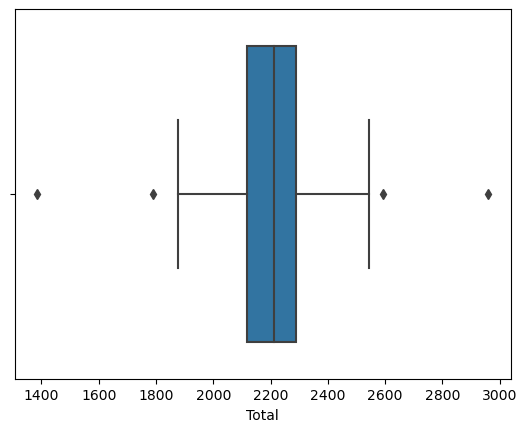

In [3]:
box_plot = p1.Third_Mod(Hcrime,df1)

# Research Answer

As we can see from the above data that my theory on More crime happends on holidays is not true. However, During Newyears day there is a significanly more crime happing. With it being more than 3 standard deviations away.The same time christmas eve, there is a significan amount of decrease in crime, that is alos 3 standard deviations away. Although I did not cauluate Christmas day being less than 3 standard deviations away the box plot shows that is outside the standard deviation. Although Holidays dont have an increase in crime, Some holidays seem to have a large inflence on crime in Vancouver. NewYears being one of them and Christmas eve being the other